In [1]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import median_absolute_error
pd.set_option('display.max_columns', None) # Show all properties on display

In [2]:
train_df = pd.read_csv(r"Dataset/MohsHardnessDataset/train.csv", encoding='utf-8')
test_df = pd.read_csv(r"Dataset/MohsHardnessDataset/test.csv", encoding='utf-8')
original_df = pd.read_csv(r"Dataset/MohsHardnessDataset/Mineral_Dataset_Supplementary_Info.csv", encoding='utf-8')
train_df.shape, test_df.shape, original_df.shape

((10407, 13), (6939, 12), (622, 13))

In [3]:
train_df.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
test_df.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [5]:
original_df.head(5)

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667
1,1,5.5,406.0,30.472136,9.902439,4.682927,19.813180,11.456151,2.700244,1.676829,0.868293,0.522909,0.743223
2,2,5.5,406.0,30.472464,10.410256,4.923077,20.931371,11.541405,2.753590,1.703846,0.894359,0.497498,0.781345
3,3,5.5,476.0,61.142136,11.609756,4.682927,23.659644,11.487395,2.763659,1.714634,0.848780,0.519474,1.491272
4,4,5.5,476.0,61.142464,12.205128,4.923077,24.975089,11.574251,2.820256,1.743590,0.873846,0.493887,1.567755


In [6]:
# Compare features between train data and original data
print(train_df.shape)
train_df.columns.tolist()

(10407, 13)


['id',
 'allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

In [7]:
print(original_df.shape)
original_df.columns.tolist()

(622, 13)


['Unnamed: 0',
 'Hardness',
 'allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average']

In [8]:
# Concat train and original data
train = pd.concat([train_df, original_df]).reset_index(drop=True)
train.shape

(11029, 14)

In [9]:
train.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness,Unnamed: 0
0,0.0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0,NaN
1,1.0,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5,NaN
2,2.0,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5,NaN
3,3.0,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0,NaN
4,4.0,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0,NaN


In [10]:
train.columns.tolist()

['id',
 'allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness',
 'Unnamed: 0']

In [11]:
train = train.drop(columns=['id', 'Unnamed: 0'], axis=1)
test_df.drop(columns=['id'], axis=1, inplace=True)
train.columns.tolist()

['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

In [12]:
print(f'Train data: {train.shape}')
print(f'Test data: {test_df.shape}\n')

train_data_percentage = np.round(train.shape[0] / (train.shape[0] + test_df.shape[0]), 4)
print(f'Train data consists of {train_data_percentage * 100}% of all observations')
print(f'Test data consists of {(1 - train_data_percentage) * 100}% of all observations')

Train data: (11029, 12)
Test data: (6939, 11)

Train data consists of 61.38% of all observations
Test data consists of 38.62% of all observations


In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
allelectrons_Total,11029.0,138.478018,300.368288,0.0,68.000000,100.000000,138.000000,15300.000000
density_Total,11029.0,15.245564,18.357166,0.0,7.558488,11.073072,17.590000,643.093804
allelectrons_Average,11029.0,16.907728,10.453091,0.0,10.000000,12.500000,21.833333,67.000000
val_e_Average,11029.0,4.539603,0.698567,0.0,4.000000,4.700000,4.800000,6.000000
atomicweight_Average,11029.0,37.210823,25.961319,0.0,20.298893,26.164726,48.719500,167.400000
ionenergy_Average,11029.0,10.947921,1.430073,0.0,10.599905,11.221459,11.688350,15.245810
el_neg_chi_Average,11029.0,2.608727,0.339107,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,11029.0,1.727907,0.197129,0.0,1.672500,1.732000,1.797813,2.250000
R_cov_element_Average,11029.0,0.940243,0.181762,0.0,0.864000,0.914286,0.980000,1.615840
zaratio_Average,11029.0,0.494563,0.065491,0.0,0.476196,0.489272,0.496606,0.825990


In [14]:
print('TRAIN data\n')
print(f'{train.isna().sum()}')

print('TEST data\n')
print(test_df.isna().sum())

TRAIN data

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64
TEST data

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64


In [15]:
train_duplicates_number = train[train.duplicated()]
len(train_duplicates_number)

23

In [16]:
train = train.drop_duplicates()

# Check whether all duplicates were removed
duplicates = train[train.duplicated()]
len(duplicates)

0

array([[<Axes: title={'center': 'allelectrons_Total'}>,
        <Axes: title={'center': 'density_Total'}>,
        <Axes: title={'center': 'allelectrons_Average'}>],
       [<Axes: title={'center': 'val_e_Average'}>,
        <Axes: title={'center': 'atomicweight_Average'}>,
        <Axes: title={'center': 'ionenergy_Average'}>],
       [<Axes: title={'center': 'el_neg_chi_Average'}>,
        <Axes: title={'center': 'R_vdw_element_Average'}>,
        <Axes: title={'center': 'R_cov_element_Average'}>],
       [<Axes: title={'center': 'zaratio_Average'}>,
        <Axes: title={'center': 'density_Average'}>,
        <Axes: title={'center': 'Hardness'}>]], dtype=object)

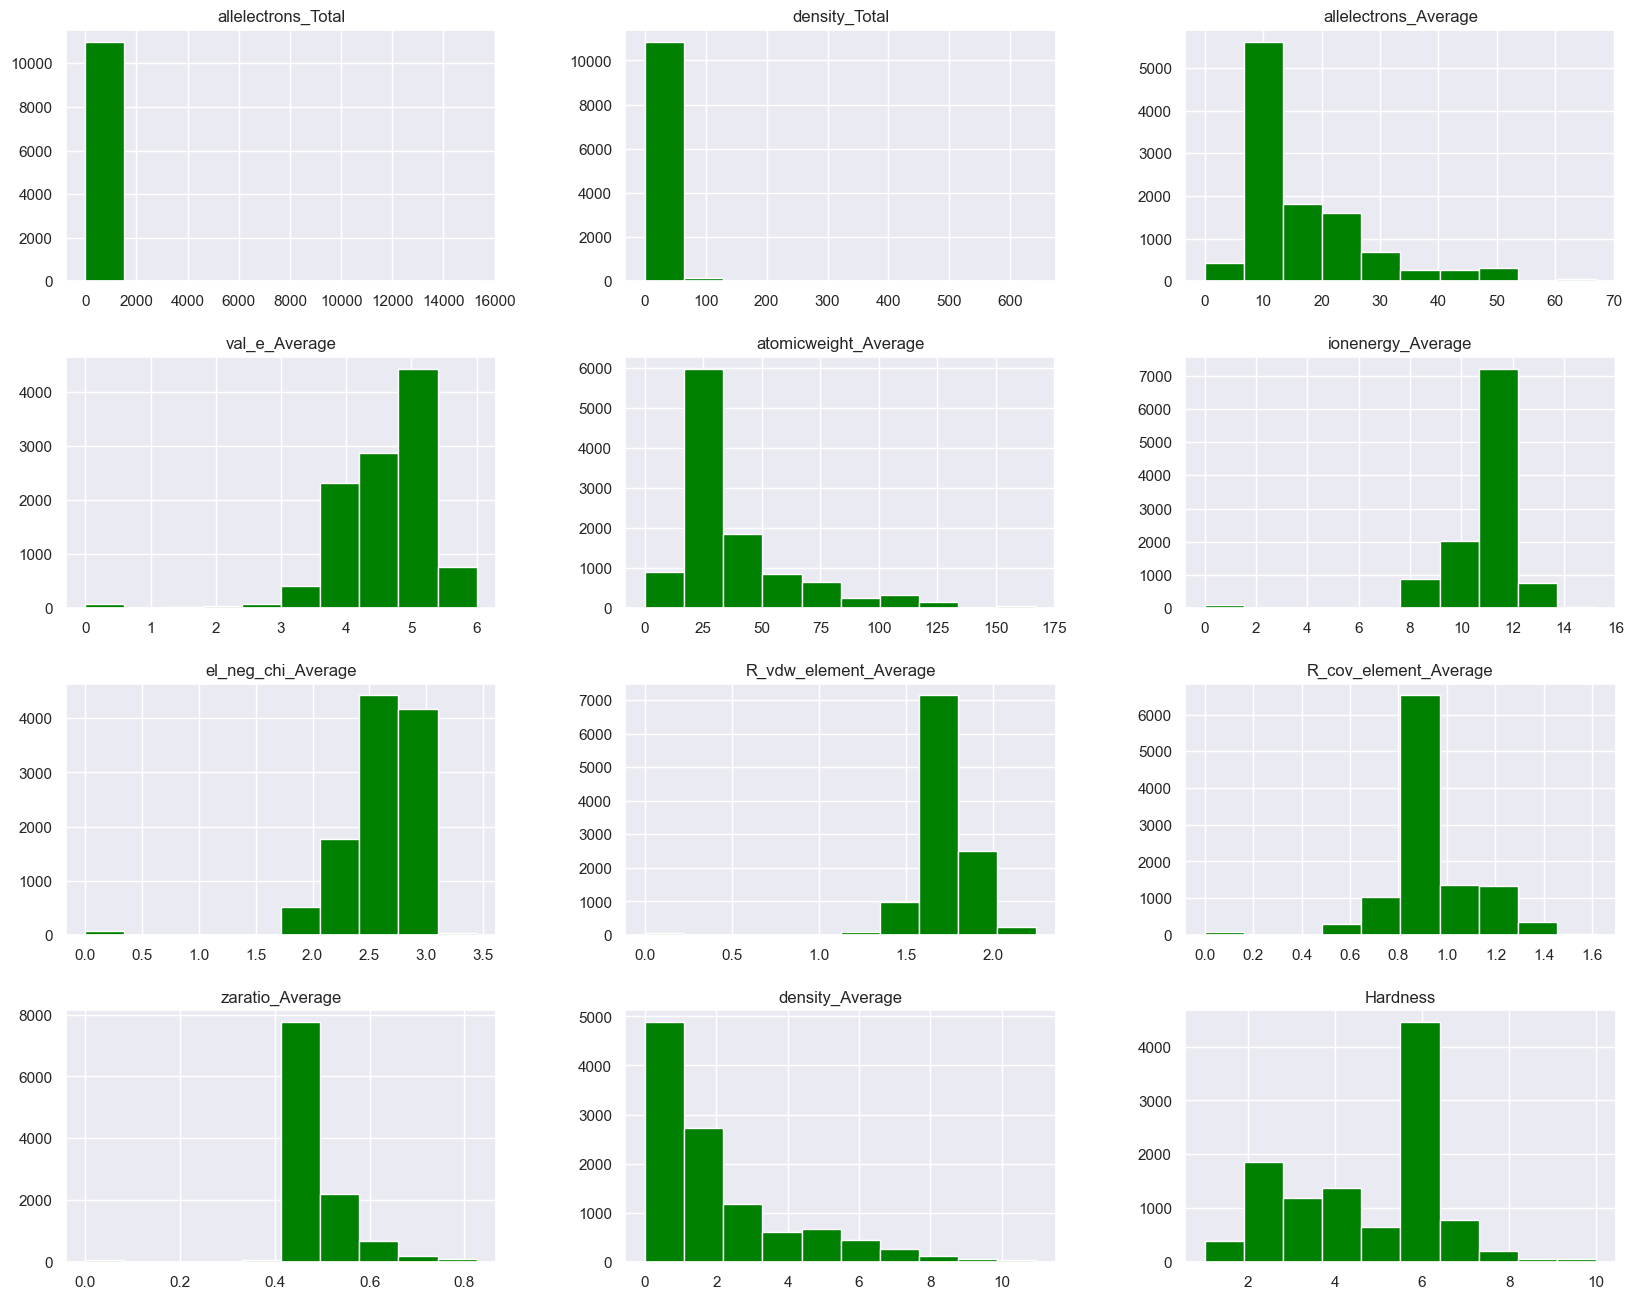

In [17]:
sns.set(rc={'figure.figsize': (20, 16)})
train.hist(color='green')

In [18]:
print(f'{train.Hardness.value_counts()}\n\n')
print(train.Hardness.value_counts() / train.shape[0])

Hardness
6.00     2128
5.50     1573
2.50     1126
3.80      741
5.80      449
6.50      418
2.80      415
2.00      412
5.00      392
4.00      380
3.00      321
2.30      307
3.50      291
6.30      281
6.80      254
1.50      200
1.80      167
3.30      156
5.30      146
4.30      137
4.80      113
4.50      109
7.00      107
7.50      106
7.80       72
9.00       34
10.00      31
9.50       26
1.30       20
8.50       16
8.00       14
6.20       11
7.30       11
5.75       10
2.90        7
8.10        7
1.00        3
3.60        2
3.20        2
8.30        1
5.40        1
6.70        1
2.60        1
4.10        1
2.20        1
4.70        1
6.40        1
9.80        1
2.10        1
6.64        1
Name: count, dtype: int64


Hardness
6.00     0.193349
5.50     0.142922
2.50     0.102308
3.80     0.067327
5.80     0.040796
6.50     0.037979
2.80     0.037707
2.00     0.037434
5.00     0.035617
4.00     0.034527
3.00     0.029166
2.30     0.027894
3.50     0.026440
6.30     0.025532
6.

array([[<Axes: title={'center': 'allelectrons_Total'}>,
        <Axes: title={'center': 'density_Total'}>,
        <Axes: title={'center': 'allelectrons_Average'}>],
       [<Axes: title={'center': 'val_e_Average'}>,
        <Axes: title={'center': 'atomicweight_Average'}>,
        <Axes: title={'center': 'ionenergy_Average'}>],
       [<Axes: title={'center': 'el_neg_chi_Average'}>,
        <Axes: title={'center': 'R_vdw_element_Average'}>,
        <Axes: title={'center': 'R_cov_element_Average'}>],
       [<Axes: title={'center': 'zaratio_Average'}>,
        <Axes: title={'center': 'density_Average'}>, <Axes: >]],
      dtype=object)

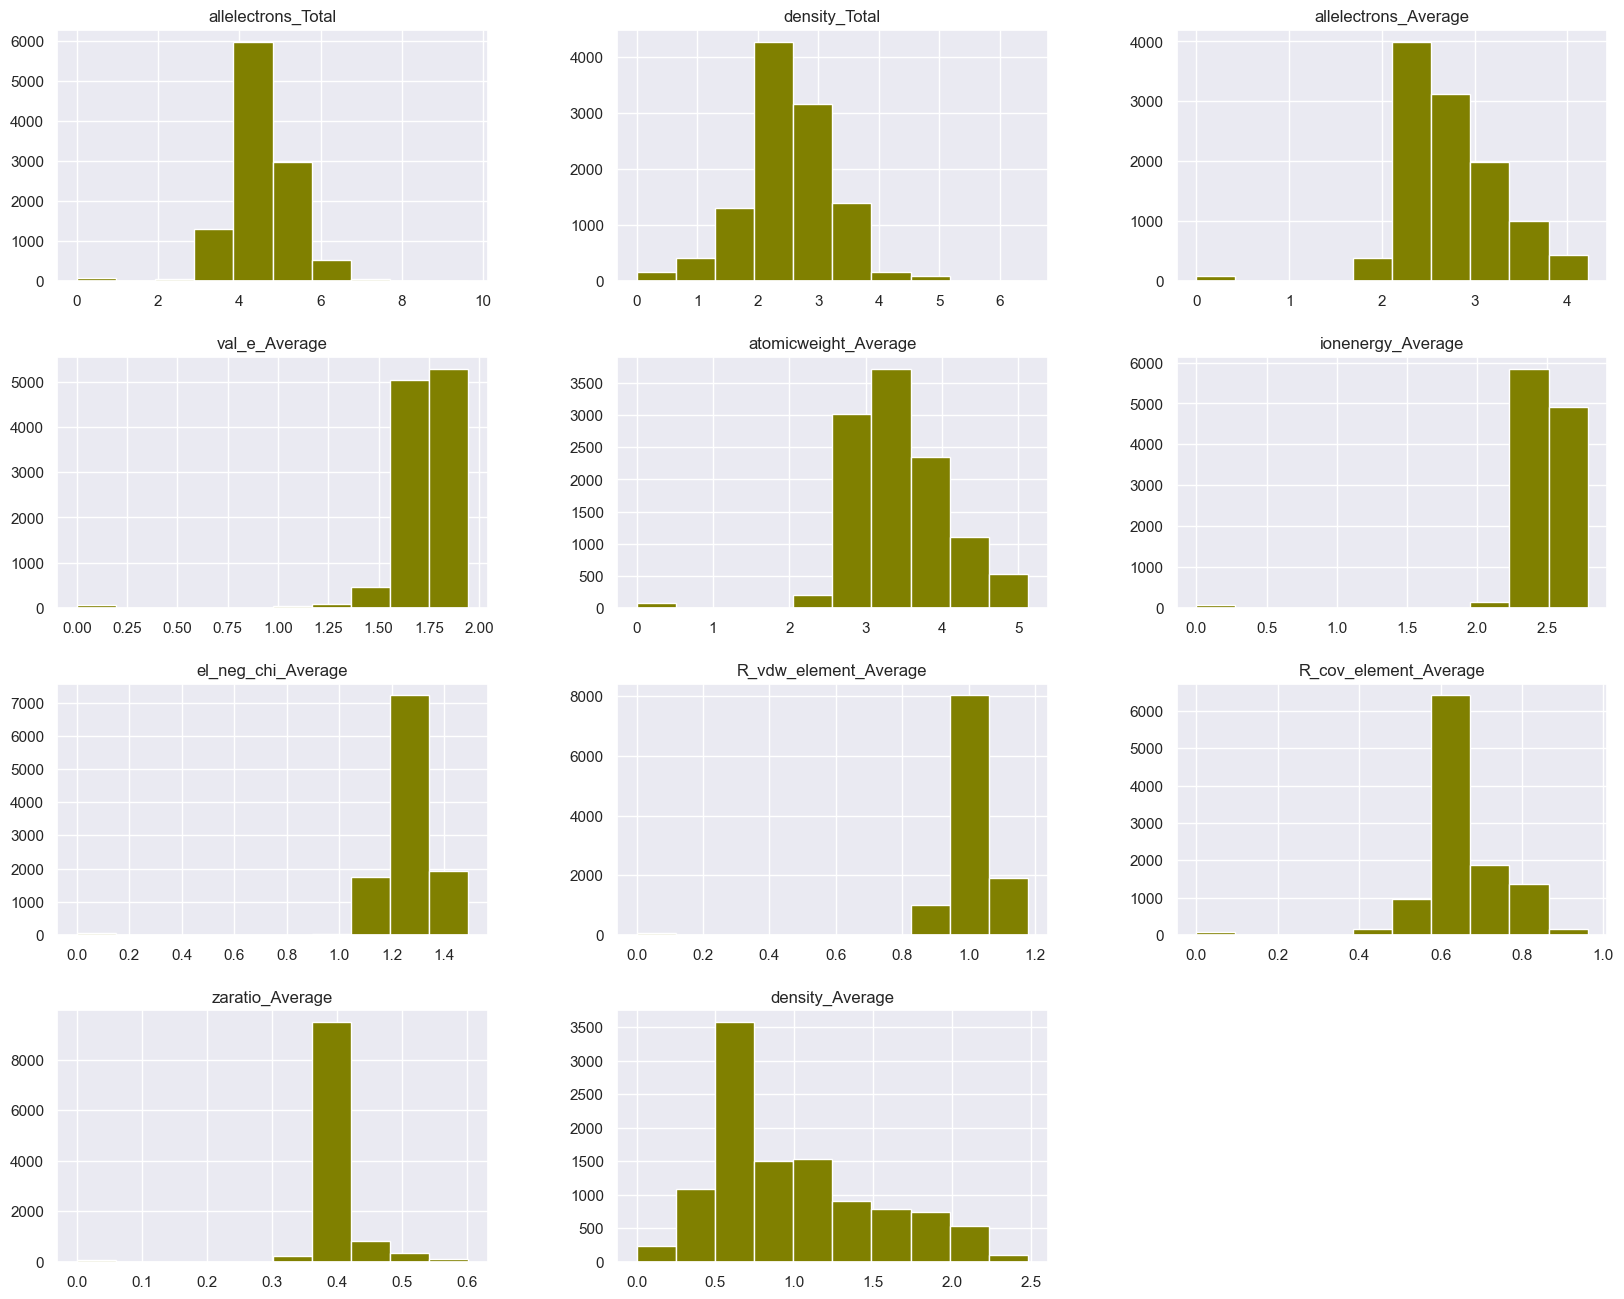

In [19]:
# Split the train data into X and y
X = train.drop(['Hardness'], axis=1)
y = train.Hardness

for column in X.columns.tolist():
    X[column] = X[column].apply(lambda x: np.log(x + 1))

# Transform test data
for column in test_df.columns.tolist():
    test_df[column] = test_df[column].apply(lambda x: np.log(x + 1))

X.hist(color='olive')

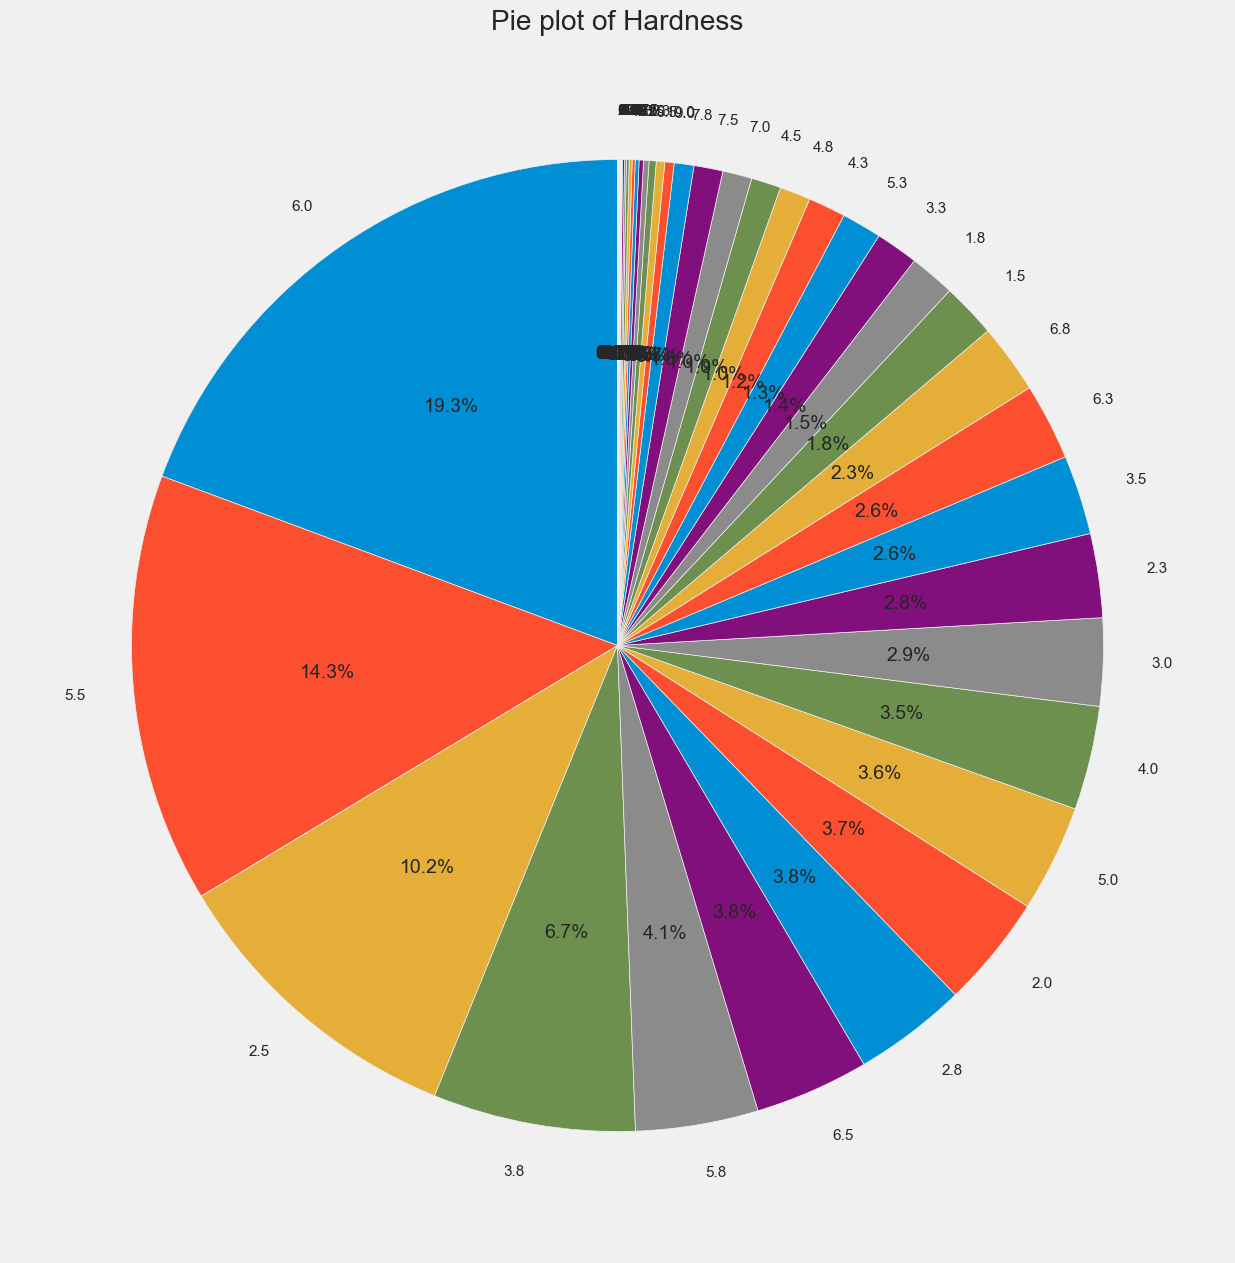

In [20]:
label_counts = y.value_counts()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 15))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie plot of Hardness')
plt.show()

In [21]:
correlation = X.corr()
correlation

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
allelectrons_Total,1.000000,0.746072,0.360977,0.454941,0.382169,0.442747,0.409463,0.427726,0.304653,0.268399,0.194445
density_Total,0.746072,1.000000,0.546262,0.251807,0.551054,0.157953,0.131232,0.374229,0.381403,-0.011544,0.508791
allelectrons_Average,0.360977,0.546262,1.000000,0.322709,0.993781,0.172296,0.076554,0.683805,0.796836,-0.139404,0.794130
val_e_Average,0.454941,0.251807,0.322709,1.000000,0.357506,0.728488,0.720674,0.623490,0.411243,0.330322,0.034525
atomicweight_Average,0.382169,0.551054,0.993781,0.357506,1.000000,0.216438,0.120024,0.703797,0.798779,-0.106693,0.782727
ionenergy_Average,0.442747,0.157953,0.172296,0.728488,0.216438,1.000000,0.851527,0.591026,0.247878,0.697807,-0.118336
el_neg_chi_Average,0.409463,0.131232,0.076554,0.720674,0.120024,0.851527,1.000000,0.480494,0.136317,0.561325,-0.177026
R_vdw_element_Average,0.427726,0.374229,0.683805,0.623490,0.703797,0.591026,0.480494,1.000000,0.806240,0.240384,0.382997
R_cov_element_Average,0.304653,0.381403,0.796836,0.411243,0.798779,0.247878,0.136317,0.806240,1.000000,-0.071022,0.561643
zaratio_Average,0.268399,-0.011544,-0.139404,0.330322,-0.106693,0.697807,0.561325,0.240384,-0.071022,1.000000,-0.302364


In [22]:
X = X.drop('atomicweight_Average', axis=1)
test_df = test_df.drop('atomicweight_Average', axis=1)

In [23]:
xgb_regressor = XGBRegressor(random_state=27)
xgb_parameters = {
     'n_estimators': range(50, 1000, 25),
     'learning_rate': [0.001, 0.05, 0.01],
     'max_depth': range(2, 20, 2),
}
xgb_random_search = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=xgb_parameters, n_jobs=-1, cv=5)
xgb_random_search.fit(X, y)
xgb_random_search.best_params_ 
# {'n_estimators': 675, 'max_depth': 4, 'learning_rate': 0.01}

/opt/homebrew/Caskroom/miniforge/base/envs/ml_Kaggle/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 675, 'max_depth': 4, 'learning_rate': 0.05}

In [30]:
catboost_regressor = CatBoostRegressor(random_state=27)
catboost_parameters = {
    'iterations': range(50, 501, 25),
    'learning_rate': [0.001, 0.05, 0.01],
    'depth': range(2, 11, 2),
}
catboost_random_search = RandomizedSearchCV(estimator=catboost_regressor, param_distributions=catboost_parameters, n_jobs=-1, cv=5)
catboost_random_search.fit(X, y)
catboost_random_search.best_params_
# 

0:	learn: 1.6825431	total: 97.9ms	remaining: 24.4s
1:	learn: 1.6819447	total: 138ms	remaining: 17.2s
2:	learn: 1.6813690	total: 321ms	remaining: 26.4s
3:	learn: 1.6807795	total: 472ms	remaining: 29.1s
4:	learn: 1.6801786	total: 696ms	remaining: 34.1s
5:	learn: 1.6795690	total: 775ms	remaining: 31.5s
6:	learn: 1.6789565	total: 888ms	remaining: 30.8s
7:	learn: 1.6783290	total: 956ms	remaining: 28.9s
8:	learn: 1.6777222	total: 1.02s	remaining: 27.4s
9:	learn: 1.6770953	total: 1.07s	remaining: 25.7s
10:	learn: 1.6764839	total: 1.14s	remaining: 24.8s
11:	learn: 1.6758858	total: 1.22s	remaining: 24.2s
12:	learn: 1.6753075	total: 1.34s	remaining: 24.5s
13:	learn: 1.6746770	total: 1.46s	remaining: 24.6s
14:	learn: 1.6740698	total: 1.52s	remaining: 23.8s
15:	learn: 1.6734538	total: 1.58s	remaining: 23.1s
16:	learn: 1.6728433	total: 1.64s	remaining: 22.5s
17:	learn: 1.6722542	total: 1.73s	remaining: 22.3s
18:	learn: 1.6716491	total: 1.81s	remaining: 22s
19:	learn: 1.6710334	total: 1.95s	remainin

{'learning_rate': 0.05, 'iterations': 500, 'depth': 6}

In [24]:
lgbm_regressor = LGBMRegressor(random_state=27)

lgbm_parameters = {
    'n_estimators': range(50, 751, 25),
    'learning_rate': [0.001, 0.05, 0.01],
    'max_depth': range(2, 21, 2),
}

lgbm_random_search = RandomizedSearchCV(estimator=lgbm_regressor, param_distributions=lgbm_parameters, n_jobs=-1, cv=5)
lgbm_random_search.fit(X, y)
lgbm_random_search.best_params_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2306
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 10
[LightGBM] [Info] Start training from score 4.641503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

{'n_estimators': 475, 'max_depth': 4, 'learning_rate': 0.05}

In [25]:
random_forest_regressor = RandomForestRegressor(random_state=27)
param_dict = {
     'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
     'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth': [int(x) for x in np.linspace(10, 110, num=21)],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
     'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=random_forest_regressor, param_distributions=param_dict, n_jobs=-1, cv=5)
random_search.fit(X, y)
random_search.best_params_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/Caskroom/miniforge/base/envs/ml_Kaggle/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/Caskroom/miniforge/base/envs/ml_Kaggle/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_Kaggle/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_Kaggle/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_Kaggle/lib/pyth

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': True}

In [26]:
HGB_regressor = HistGradientBoostingRegressor(random_state=27)
param_dict = {
    'learning_rate': [0.001, 0.05, 0.01],
    'max_iter': range(50, 1001, 25),
    'max_depth': range(2, 81, 2),
    'min_samples_leaf': [10, 20, 30]
}
random_search = RandomizedSearchCV(estimator=HGB_regressor, param_distributions=param_dict, n_jobs=-1, cv=5)
random_search.fit(X, y)
random_search.best_params_

{'min_samples_leaf': 20,
 'max_iter': 225,
 'max_depth': 24,
 'learning_rate': 0.05}

In [27]:
ETR_regressor = ExtraTreesRegressor(random_state=27)
param_dict = {
    'n_estimators': range(50, 1001, 25),
    'max_depth': range(2, 81, 2),
    'min_samples_leaf': [10, 20, 30]
}
random_search = RandomizedSearchCV(estimator=ETR_regressor, param_distributions=param_dict, n_jobs=-1, cv=5)
random_search.fit(X, y)
random_search.best_params_

{'n_estimators': 1000, 'min_samples_leaf': 10, 'max_depth': 66}

In [28]:
AdaBoost_regressor = AdaBoostRegressor(random_state=27)
param_dict = {
    'n_estimators': range(50, 1001, 25),
    'learning_rate': [0.001, 0.05, 0.01]
}
random_search = RandomizedSearchCV(estimator=AdaBoost_regressor, param_distributions=param_dict, n_jobs=-1, cv=5)
random_search.fit(X, y)
random_search.best_params_

{'n_estimators': 475, 'learning_rate': 0.01}

In [29]:
# Baseline models Training
base_models = [
    ('catboost', CatBoostRegressor(
        iterations=800,
        learning_rate=0.05,
        depth=6,
        random_state=27
    )),
    ('xgboost', XGBRegressor(
        n_estimators=525,
        learning_rate=0.05,
        max_depth=4,
        random_state=27
    )),
    ('lightgbm', LGBMRegressor(
        n_estimators=850,
        learning_rate=0.01,
        max_depth=8,
        random_state=27
    )),
    ('randomforest', RandomForestRegressor(
        n_estimators=600,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features='log2',
        max_depth=60,
        bootstrap=True,
        random_state=27
    )),
    ('HistGradientBoostingRegressor', HistGradientBoostingRegressor(
        min_samples_leaf=30,
        max_iter=925,
        max_depth=91,
        learning_rate=0.01
    )),
    ('ExtraTreesRegressor', ExtraTreesRegressor(
        n_estimators=800,
        min_samples_leaf=10,
        max_depth=89
    )),
    ('AdaBoostRegressor', AdaBoostRegressor(
        n_estimators=425,
        learning_rate=0.01
    ))
]

In [32]:
meta_model = XGBRegressor(
    n_estimators=525,
    learning_rate=0.05,
    max_depth=4,
    random_state=27
)

In [33]:
X_train, X_val, y_val, y_val = train_test_split(X, y, test_size=0.2, random_state=27)

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X, y)

0:	learn: 1.6545837	total: 2.58ms	remaining: 2.06s
1:	learn: 1.6292809	total: 4.65ms	remaining: 1.85s
2:	learn: 1.6060342	total: 6.45ms	remaining: 1.71s
3:	learn: 1.5838807	total: 8.38ms	remaining: 1.67s
4:	learn: 1.5625438	total: 10.5ms	remaining: 1.67s
5:	learn: 1.5435439	total: 12.7ms	remaining: 1.69s
6:	learn: 1.5259511	total: 14.7ms	remaining: 1.66s
7:	learn: 1.5090675	total: 17.1ms	remaining: 1.69s
8:	learn: 1.4941477	total: 18.9ms	remaining: 1.66s
9:	learn: 1.4798732	total: 20.6ms	remaining: 1.63s
10:	learn: 1.4659560	total: 22.3ms	remaining: 1.6s
11:	learn: 1.4536715	total: 24.2ms	remaining: 1.59s
12:	learn: 1.4422910	total: 25.9ms	remaining: 1.57s
13:	learn: 1.4309180	total: 27.6ms	remaining: 1.55s
14:	learn: 1.4198545	total: 29.3ms	remaining: 1.53s
15:	learn: 1.4103422	total: 31.2ms	remaining: 1.53s
16:	learn: 1.4017979	total: 33ms	remaining: 1.52s
17:	learn: 1.3937983	total: 34.8ms	remaining: 1.51s
18:	learn: 1.3863088	total: 36.6ms	remaining: 1.51s
19:	learn: 1.3793355	tota

StackingRegressor(estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x12cc069b0>),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_pol...
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.05, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=4,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=525, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=27, ...))

In [34]:
y_pred_val = stacking_model.predict(X_val)

medae_val = median_absolute_error(y_val, y_pred_val)
print(f"Validation Median Absolute Error: {medae_val:.4f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Validation Median Absolute Error: 0.4424


In [36]:
y_pred_test = stacking_model.predict(test_df)
y_pred_test[:10]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([2.6557703, 2.6972022, 6.11158  , 3.8787785, 5.3764186, 4.8598375,
       3.5849235, 5.30309  , 2.994891 , 4.637891 ], dtype=float32)

In [38]:
sample_submission = pd.read_csv(r"Dataset/MohsHardnessDataset/sample_submission.csv", encoding='utf-8')

In [44]:
submission = pd.DataFrame({
    'id': sample_submission.id,
    'Hardness':y_pred_test
})

submission.to_csv(r"DataSet/MohsHardnessDataset/Prediction/20231116_BaselinePrediction.csv", index=False)
submission.head()

,id,Hardness
0,10407,2.655770
1,10408,2.697202
2,10409,6.111580
3,10410,3.878778
4,10411,5.376419
